# CB02-2: Building NN with Numpy&Pure Python
## Recap
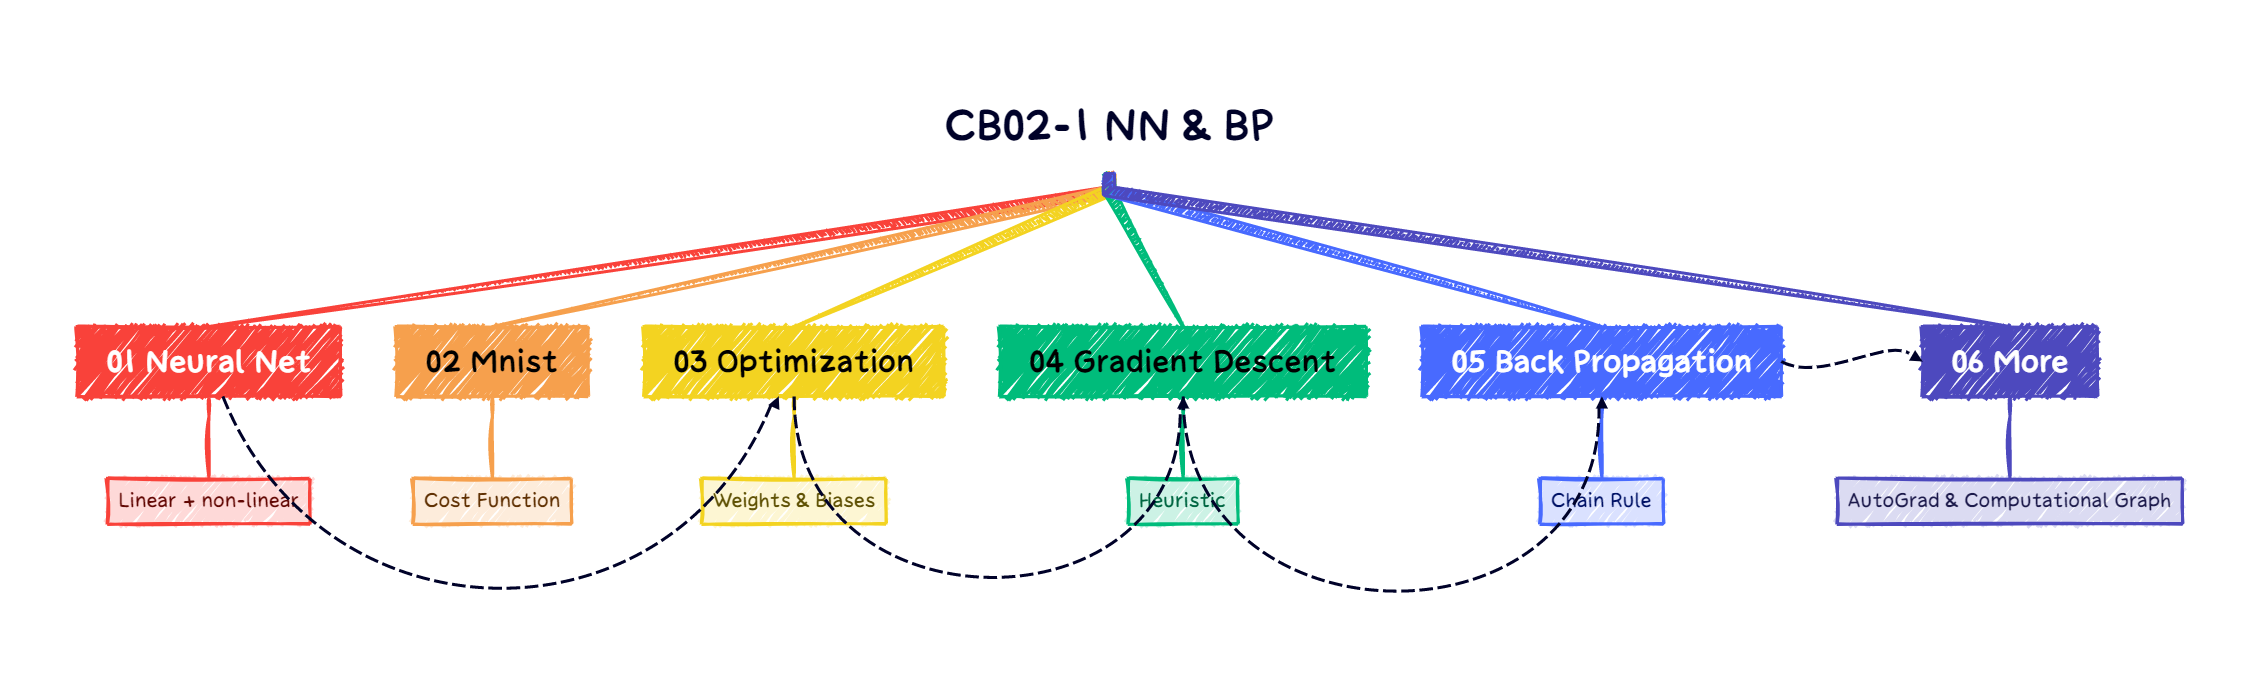

## Part Zero: Python Env
1. mini-conda / Anaconda
2. conda create -n nn python=3.11 -> conda activate nn ->换源
3. pip install numpy
4. ide: vscode | jupyter notebook(pip install jupyter) | pycharm

## Part One: NN Setup
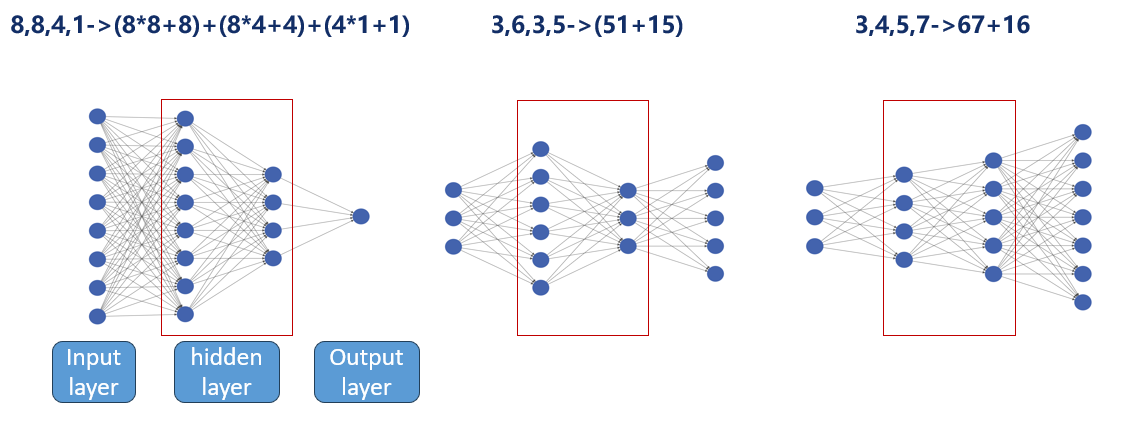

In [9]:
import numpy as np
class network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

network = network([784, 16, 16, 10])
len(network.weights),network.weights[0].shape, network.weights[1].shape, network.weights[2].shape

## Part Two: Feedforward
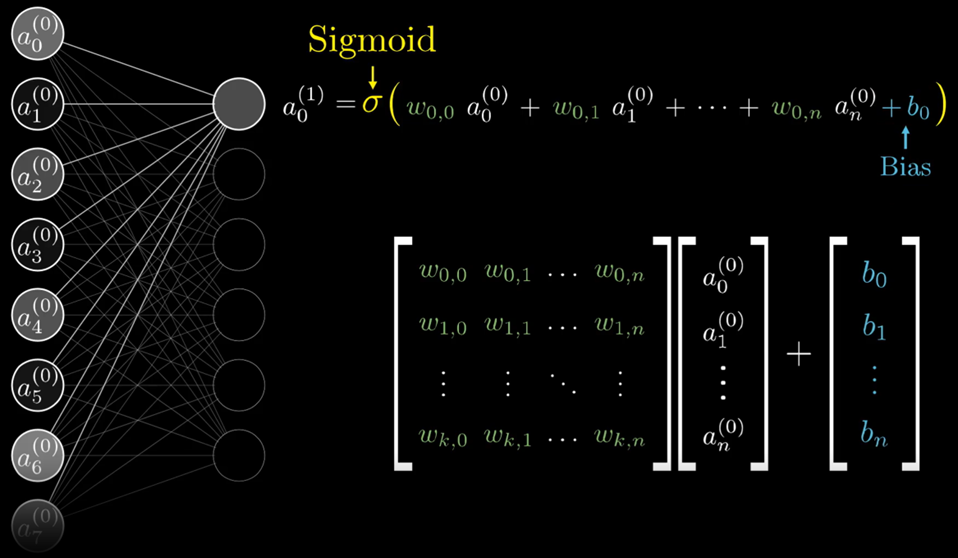

In [10]:

def feedforward(input):
        """Return the output of the network if ``a`` is input."""
        linear_outputs = []
        activations = [input]

        for b, w in zip(network.biases, network.weights):
            linear_output = np.dot(w, activations[-1])+b
            activation = opt.sigmoid(linear_output)
            
            linear_outputs.append(linear_output)
            activations.append(activation)
            
        return activations, linear_outputs

In [11]:
class optimizer():
    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(-x))

    def sigmoid_prime(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))       
    
opt = optimizer()

## Part Three: Mini-batch SGD
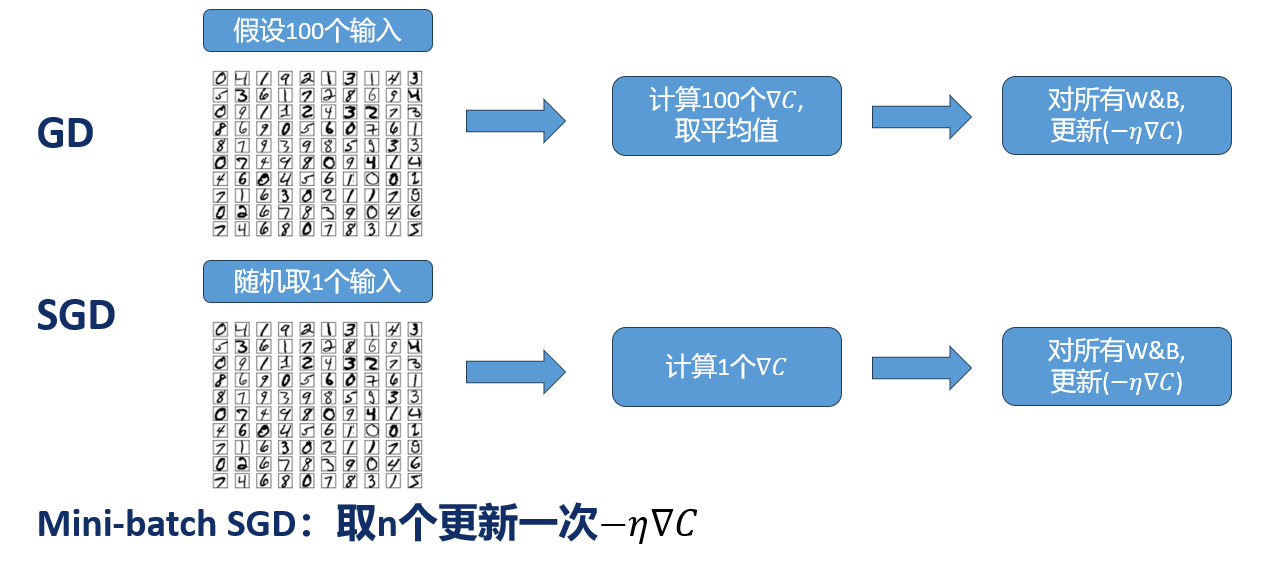

In [12]:
import random
## SGD V1:
def SGD(epochs, training_data, mini_batch_size, eta, test_data=None):
    n = len(training_data)
    for i in range(epochs):
        random.shuffle(training_data)
        mini_batchs = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
        for mini_batch in mini_batchs:
            update_mini_batch(mini_batch, eta)
            
        # V2: Add test_data
        if test_data:
            print("Epoch {}: {} / {}, precision is {:.2f}%".format(i, evaluate(test_data), len(test_data), evaluate(test_data)/len(test_data)*100))
        else:
            print("Epoch {} complete".format(i))

def evaluate(test_data):
    test_results = [(np.argmax(feedforward(x)[0][-1]), y) for (x, y) in test_data]
    return sum(int(x == y) for (x, y) in test_results)

In [13]:
def update_mini_batch(mini_batch, eta):
    buffer_w = [np.zeros(w.shape) for w in network.weights]
    buffer_b = [np.zeros(b.shape) for b in network.biases]

    for x, y in mini_batch:
        delta_w, delta_b = backprop(x, y) # bp for one sample
        buffer_w = [bw+dw for bw, dw in zip(buffer_w, delta_w)]
        buffer_b = [bb+db for bb, db in zip(buffer_b, delta_b)]

    network.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(network.weights, delta_w)]
    network.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(network.biases, delta_b)]

## Part Four: Back Propagation
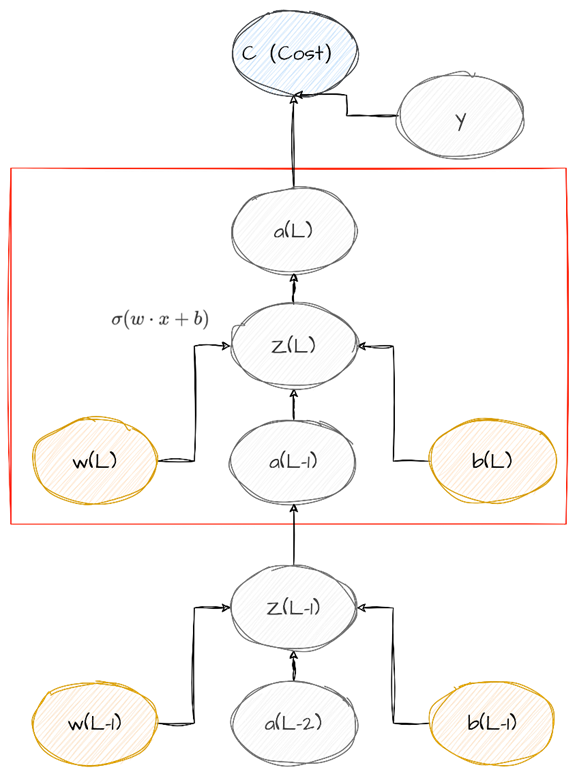

In [14]:
def backprop(x, y):
    # Feedforward Pass
    activations, linear_outputs = feedforward(x)
    
    # Backward Pass
    delta_w = [np.zeros(w.shape) for w in network.weights]
    delta_b = [np.zeros(b.shape) for b in network.biases]

    # c/z = c/a * a/z
    delta = cost_derivative(activations[-1], y) * \
        (opt.sigmoid_prime(linear_outputs[-1]))
    # c/w = c/a * a/w
    delta_w[-1] = np.dot(delta, activations[-2].transpose()) # Last/Output Layer
    # c/b = c/z * z/b
    delta_b[-1] = delta # Last/Output Layer
    
    for l in range(2, network.num_layers): # only index of layer changes
        # c/a(L-1) = c/z(L) * z/a(L-1)
        # c/z(L-1) = c/a(L-1) * a/z(L-1) 
        delta = np.dot(network.weights[-l+1].transpose(), delta) * \
            opt.sigmoid_prime(linear_outputs[-l])
        # c/w = c/a * a/w
        delta_w[-l] = np.dot(delta, activations[-l-1].transpose())
        # c/b = c/z * z/b
        delta_b[-l] = delta
    return (delta_w, delta_b)

def cost_derivative(output_activations, y):
    return (output_activations-y)/2


## Part Five: Load Mnist Data
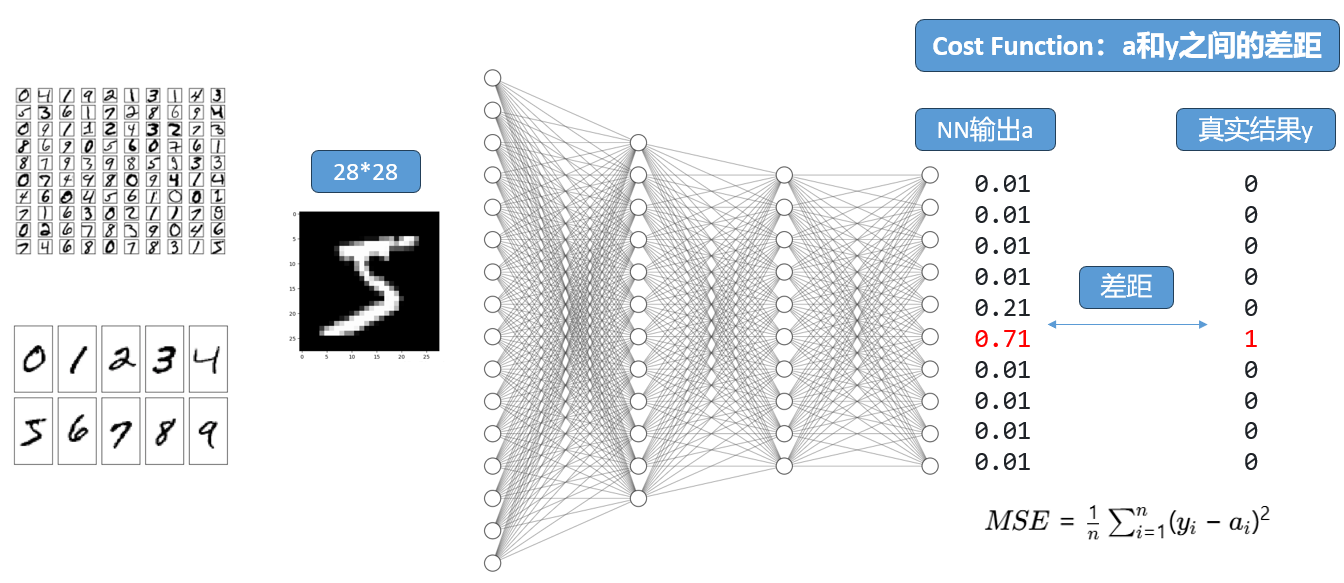

In [15]:
# download & load mnist. By Micheal Nielsen, https://github.com/mnielsen/neural-networks-and-deep-learning
import sys
sys.path.append("../")
import data_loader
training_data, validation_data, test_data = data_loader.load_data_wrapper()

In [16]:
SGD(30, training_data, 10, 3.0, test_data=test_data)

Epoch 0: 5007 / 10000, precision is 50.07%
Epoch 1: 6715 / 10000, precision is 67.15%
Epoch 2: 7513 / 10000, precision is 75.13%
Epoch 3: 7979 / 10000, precision is 79.79%
Epoch 4: 8296 / 10000, precision is 82.96%
Epoch 5: 8294 / 10000, precision is 82.94%
Epoch 6: 8464 / 10000, precision is 84.64%
Epoch 7: 8658 / 10000, precision is 86.58%
Epoch 8: 8724 / 10000, precision is 87.24%
Epoch 9: 8772 / 10000, precision is 87.72%
Epoch 10: 8769 / 10000, precision is 87.69%
Epoch 11: 8806 / 10000, precision is 88.06%
Epoch 12: 8879 / 10000, precision is 88.79%
Epoch 13: 8838 / 10000, precision is 88.38%
Epoch 14: 8876 / 10000, precision is 88.76%
Epoch 15: 8907 / 10000, precision is 89.07%
Epoch 16: 8946 / 10000, precision is 89.46%
Epoch 17: 8925 / 10000, precision is 89.25%
Epoch 18: 8993 / 10000, precision is 89.93%
Epoch 19: 8949 / 10000, precision is 89.49%
Epoch 20: 9006 / 10000, precision is 90.06%
Epoch 21: 9013 / 10000, precision is 90.13%
Epoch 22: 9010 / 10000, precision is 90.10

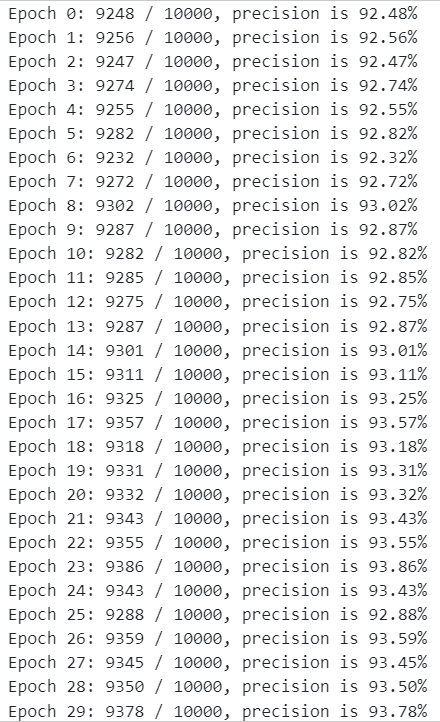
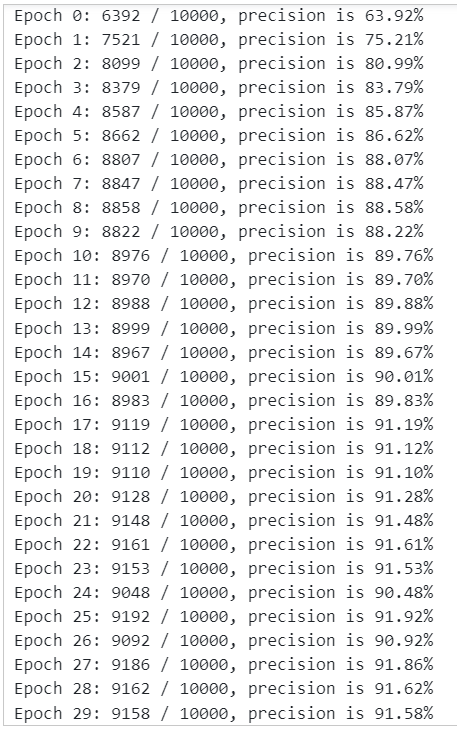